<a href="https://colab.research.google.com/github/sanghmitr/Cholesky_Decomposition/blob/master/Image_encryption_using_LCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
#Reading an image
img = mpimg.imread('/content/drive/MyDrive/image_encryption_using_LCT/lena.png')
#print(img)
#plt.imshow(img)
#plt.show()

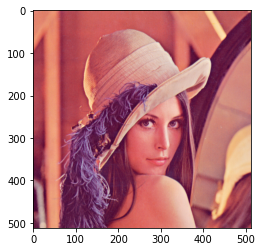

In [3]:
height = img.shape[0]
width = img.shape[1]

img2 = np.zeros_like(img)
for i in range(height):
  for j in range(width):
    img2[i,j] = img[i,j]*255

img2 = img2.astype(int)
#print(img2)
plt.imshow(img2)
plt.show()

In [4]:
#Function to generate chaotic keys
def keygen(x,r,size):
  key = []
  for i in range(size):
    x = r*x*(1-x)
    key.append(int(x*pow(10,16))%512)
  return key

In [5]:
#Generating chaotic keys for sample image
key = keygen(0.01, 3.95, height*width)
print(key)
print(len(key))


[0, 180, 493, 194, 450, 479, 377, 142, 363, 249, 80, 324, 424, 296, 311, 374, 138, 146, 407, 479, 417, 488, 115, 385, 206, 295, 431, 18, 110, 331, 162, 463, 295, 335, 365, 270, 202, 310, 87, 134, 154, 106, 6, 355, 87, 24, 162, 220, 107, 46, 307, 161, 313, 444, 480, 424, 158, 85, 449, 53, 326, 493, 313, 454, 474, 81, 117, 464, 21, 192, 12, 308, 244, 115, 264, 323, 214, 436, 53, 291, 194, 366, 509, 16, 154, 94, 168, 478, 348, 18, 467, 409, 0, 148, 372, 494, 267, 96, 65, 464, 122, 397, 486, 166, 51, 48, 204, 105, 135, 150, 110, 376, 210, 80, 171, 270, 322, 181, 38, 40, 458, 233, 30, 373, 358, 501, 100, 22, 477, 368, 440, 454, 14, 45, 11, 121, 160, 73, 7, 398, 146, 218, 70, 4, 352, 172, 181, 146, 397, 273, 134, 283, 109, 294, 126, 427, 370, 403, 254, 167, 70, 84, 21, 470, 94, 233, 407, 307, 276, 166, 31, 509, 200, 259, 508, 377, 393, 210, 120, 22, 1, 392, 56, 487, 50, 362, 214, 368, 20, 428, 474, 110, 342, 474, 31, 329, 22, 343, 154, 502, 242, 315, 440, 69, 363, 54, 52, 255, 342, 380, 452,

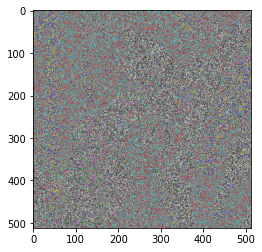

In [6]:
#Encryption-substitution with XOR
z=0
enimg = np.zeros(shape=[height, width, 3], dtype=np.uint8)
for i in range(height):
  for j in range(width):
    #pixel value is XORed with key
    enimg[i,j] = img2[i,j]^key[z]
    z+=1

#print(enimg)
plt.imshow(enimg)
plt.show()
plt.imsave('/content/drive/MyDrive/image_encryption_using_LCT/EncryptedLena.bmp', enimg)

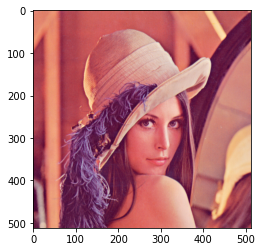

In [7]:
#Decryption
z=0
decimg = np.zeros(shape=[height,width,3], dtype=np.uint8)
for i in range(height):
  for j in range(width):
    #pixel value is XORed with key
    decimg[i,j] = enimg[i,j]^key[z]
    z+=1

#print(decimg)
plt.imshow(decimg)
plt.show()
plt.imsave('/content/drive/MyDrive/image_encryption_using_LCT/DecryptedLena.bmp', decimg)

In [8]:
def sqr_err(decimg, img):

    mse = np.zeros_like(img)
    h = img.shape[0]
    w = img.shape[1]
    for i in range(h):
      for j in range(w):
        mse[i,j] = ((decimg[i,j] - img[i,j])**2)/h*w
    return mse

In [9]:
def plot_histogram(img):
  # tuple to select colors of each channel line
  colors = ("red", "green", "blue")
  channel_ids = (0, 1, 2)

  # create the histogram plot, with three lines, one for
  # each color
  plt.xlim([0, 256])
  for channel_id, c in zip(channel_ids, colors):
      histogram, bin_edges = np.histogram(img[:, :, channel_id], bins=256, range=(0, 256))
      plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Color value")
  plt.ylabel("Pixels")

  plt.show()

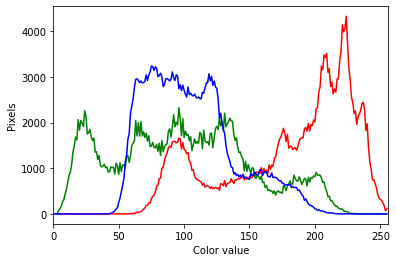

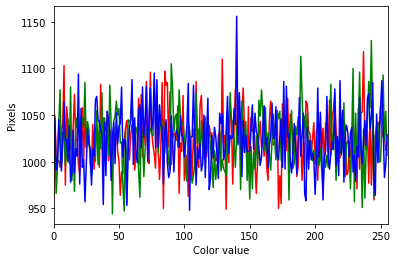

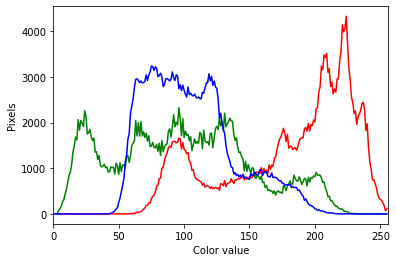

In [10]:
plot_histogram(img2)
plot_histogram(enimg)
plot_histogram(decimg)